In [3]:
import pandas as pd
import numpy as np
import networkx as nx

In [4]:
def get_degrees(G):
    deg = nx.degree_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Degree']
    deg_df['degree_rank'] = deg_df['Degree'].rank(method = 'min', ascending = False)
    return deg_df

def get_closeness(G):
    deg = nx.closeness_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Closeness']
    deg_df['closeness_rank'] = deg_df['Closeness'].rank(method = 'min', ascending = False)
    return deg_df

def get_betweeness(G):
    deg = nx.betweenness_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Betweeness']
    deg_df['betweeness_rank'] = deg_df['Betweeness'].rank(method = 'min', ascending = False)
    return deg_df

def get_load_flow(G):
    deg = nx.load_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Load']
    deg_df['load_rank'] = deg_df['Load'].rank(method = 'min', ascending = False)
    return deg_df

def get_local_reaching(G):
    deg = {}
    for x in range(len(G)): # compute local reach centrality for each node in G
        deg[x] = nx.local_reaching_centrality(G, x)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Reaching']
    deg_df['reach_rank'] = deg_df['Reaching'].rank(method = 'min', ascending = False)
    return deg_df

def get_harmonic(G):
    deg = nx.harmonic_centrality(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Harmonic']
    deg_df['harmonic_rank'] = deg_df['Harmonic'].rank(method = 'min', ascending = False)
    return deg_df

def get_page_rank(G):
    deg = nx.pagerank_scipy(G)
    deg_df = pd.Series(deg).to_frame()
    deg_df.columns = ['Page']
    deg_df['page_rank'] = deg_df['Page'].rank(method = 'min', ascending = False)
    return deg_df

In [5]:
G = nx.gnm_random_graph(10, 15)

In [16]:
ranks = pd.DataFrame()

degree_list = get_degrees(G)
closeness_list = get_closeness(G)
betweeness_list = get_betweeness(G)
load_list = get_load_flow(G)
reach_list = get_local_reaching(G)
harmonic_list = get_harmonic(G)
page_list = get_page_rank(G)

ranks['degree_rank'] = degree_list['degree_rank']
ranks['closeness_rank'] = closeness_list['closeness_rank']
ranks['betweeness_rank'] = betweeness_list['betweeness_rank']
ranks['load_rank'] = load_list['load_rank']
ranks['reach_rank'] = reach_list['reach_rank']
ranks['harmonic_rank'] = harmonic_list['harmonic_rank']
ranks['page_rank'] = page_list['page_rank']

ranks

,degree_rank,closeness_rank,betweeness_rank,load_rank,reach_rank,harmonic_rank,page_rank
0,7.0,7.0,5.0,5.0,7.0,7.0,8.0
1,4.0,2.0,8.0,8.0,4.0,4.0,5.0
2,4.0,2.0,8.0,8.0,4.0,4.0,5.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,2.0,3.0,3.0,2.0,2.0,3.0
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,7.0,7.0,10.0,10.0,7.0,7.0,10.0
7,4.0,6.0,4.0,4.0,6.0,6.0,4.0
8,7.0,7.0,5.0,6.0,7.0,7.0,9.0
9,7.0,10.0,7.0,7.0,10.0,10.0,7.0


In [22]:
corr = pd.DataFrame()

corr['closeness_rank'] = closeness_list['closeness_rank']
corr['harmonic_rank'] = harmonic_list['harmonic_rank']

corr.corr()

,closeness_rank,harmonic_rank
closeness_rank,1.00000,0.96439
harmonic_rank,0.96439,1.00000


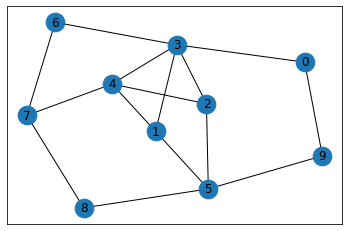

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=350)